In [1]:
'''
    Author: A.Shrikant
'''

'\n    Author: A.Shrikant\n'

In [2]:
# Attributes Information:

# label: Passenger number
# Survived: 0 = Dead 1 = Alive
# Pclass: 1 = First class 2 = Second class 3 = Third class
# Name: Name of passenger
# Sex: Gender
# Age: Age of passenger
# SibSp: # of siblings / spouses aboard the Titanic
# Parch: # of parents / children aboard the Titanic
# Ticket: Ticket number
# Fare: Passenger fare
# Cabin: Cabin number
# Embarked: C = Cherbourg Q = Queenstown S = Southampton

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('dataset/titanic_train.csv')
df_test = pd.read_csv('dataset/titanic_test.csv')

In [5]:
df_train.shape

(891, 12)

In [6]:
df_test.shape

(418, 11)

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_train.isnull().sum()/len(df_train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
df_test.isnull().sum()/len(df_test)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [11]:
df_train['IsTrain'] = True

In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [13]:
df_test['IsTrain'] = False

In [14]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False


In [15]:
# Merging both train and test data in one dataframe so as to perform the missing value treatment in one go.

df = pd.concat([df_train, df_test])

In [16]:
df.shape

(1309, 13)

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,False
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,False
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  IsTrain      1309 non-null   bool   
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 134.2+ KB


In [19]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
IsTrain         0.000000
dtype: float64

In [20]:
# Dropping the columns 'PassengerId', 'Name', 'Fare', 'Ticket', 'Cabin' because they are not important for predicting if a 
# passenger has survived or not.

df.drop(columns=['PassengerId', 'Name', 'Fare', 'Ticket', 'Cabin'], inplace=True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,IsTrain
0,0.0,3,male,22.0,1,0,S,True
1,1.0,1,female,38.0,1,0,C,True
2,1.0,3,female,26.0,0,0,S,True
3,1.0,1,female,35.0,1,0,S,True
4,0.0,3,male,35.0,0,0,S,True


### Treating the missing values for 'Age' feature.

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].median())

### Treating the missing values for 'Embarked' feature.

In [23]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [24]:
df['Embarked'] = df['Embarked'].fillna('S')

In [25]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Embarked      0
IsTrain       0
dtype: int64

### Missing value treatment done for the dataframe 'df'. The 'Survived' column has NaN values because we have merged the train and test datasets.

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,IsTrain
0,0.0,3,male,22.0,1,0,S,True
1,1.0,1,female,38.0,1,0,C,True
2,1.0,3,female,26.0,0,0,S,True
3,1.0,1,female,35.0,1,0,S,True
4,0.0,3,male,35.0,0,0,S,True
...,...,...,...,...,...,...,...,...
413,NaN,3,male,28.0,0,0,S,False
414,NaN,1,female,39.0,0,0,C,False
415,NaN,3,male,38.5,0,0,S,False
416,NaN,3,male,28.0,0,0,S,False


In [27]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.503186,0.498854,0.385027
std,0.486592,0.837836,12.905241,1.041658,0.865560
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000


### We are not treating the outliers for the 'Age' column because the range of the 'Age' is not large.

### Applying One Hot Encoding for the 'Embarked' feature.

In [28]:
df = pd.get_dummies(df, columns=['Embarked'])

In [29]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,IsTrain,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,male,22.0,1,0,True,0,0,1
1,1.0,1,female,38.0,1,0,True,1,0,0
2,1.0,3,female,26.0,0,0,True,0,0,1
3,1.0,1,female,35.0,1,0,True,0,0,1
4,0.0,3,male,35.0,0,0,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,28.0,0,0,False,0,0,1
414,NaN,1,female,39.0,0,0,False,1,0,0
415,NaN,3,male,38.5,0,0,False,0,0,1
416,NaN,3,male,28.0,0,0,False,0,0,1


In [30]:
df.drop(columns=['Embarked_S'], inplace=True)

In [31]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,IsTrain,Embarked_C,Embarked_Q
0,0.0,3,male,22.0,1,0,True,0,0
1,1.0,1,female,38.0,1,0,True,1,0
2,1.0,3,female,26.0,0,0,True,0,0
3,1.0,1,female,35.0,1,0,True,0,0
4,0.0,3,male,35.0,0,0,True,0,0
...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,28.0,0,0,False,0,0
414,NaN,1,female,39.0,0,0,False,1,0
415,NaN,3,male,38.5,0,0,False,0,0
416,NaN,3,male,28.0,0,0,False,0,0


### Applying label Encoding for the 'Sex' variable.

In [32]:
df['Sex'] = df['Sex'].astype('category').cat.codes

In [33]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,IsTrain,Embarked_C,Embarked_Q
0,0.0,3,1,22.0,1,0,True,0,0
1,1.0,1,0,38.0,1,0,True,1,0
2,1.0,3,0,26.0,0,0,True,0,0
3,1.0,1,0,35.0,1,0,True,0,0
4,0.0,3,1,35.0,0,0,True,0,0
...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,28.0,0,0,False,0,0
414,NaN,1,0,39.0,0,0,False,1,0
415,NaN,3,1,38.5,0,0,False,0,0
416,NaN,3,1,28.0,0,0,False,0,0


### Splitting the dataframe 'df' back to train and test datasets.

In [34]:
df_train2 = df[df['IsTrain'] == True]
df_test2 = df[df['IsTrain'] == False]

In [35]:
df_train2

,Survived,Pclass,Sex,Age,SibSp,Parch,IsTrain,Embarked_C,Embarked_Q
0,0.0,3,1,22.0,1,0,True,0,0
1,1.0,1,0,38.0,1,0,True,1,0
2,1.0,3,0,26.0,0,0,True,0,0
3,1.0,1,0,35.0,1,0,True,0,0
4,0.0,3,1,35.0,0,0,True,0,0
...,...,...,...,...,...,...,...,...,...
886,0.0,2,1,27.0,0,0,True,0,0
887,1.0,1,0,19.0,0,0,True,0,0
888,0.0,3,0,28.0,1,2,True,0,0
889,1.0,1,1,26.0,0,0,True,1,0


In [36]:
df_test2

,Survived,Pclass,Sex,Age,SibSp,Parch,IsTrain,Embarked_C,Embarked_Q
0,NaN,3,1,34.5,0,0,False,0,1
1,NaN,3,0,47.0,1,0,False,0,0
2,NaN,2,1,62.0,0,0,False,0,1
3,NaN,3,1,27.0,0,0,False,0,0
4,NaN,3,0,22.0,1,1,False,0,0
...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,28.0,0,0,False,0,0
414,NaN,1,0,39.0,0,0,False,1,0
415,NaN,3,1,38.5,0,0,False,0,0
416,NaN,3,1,28.0,0,0,False,0,0


## Data Visualization:

<Figure size 1400x500 with 0 Axes>

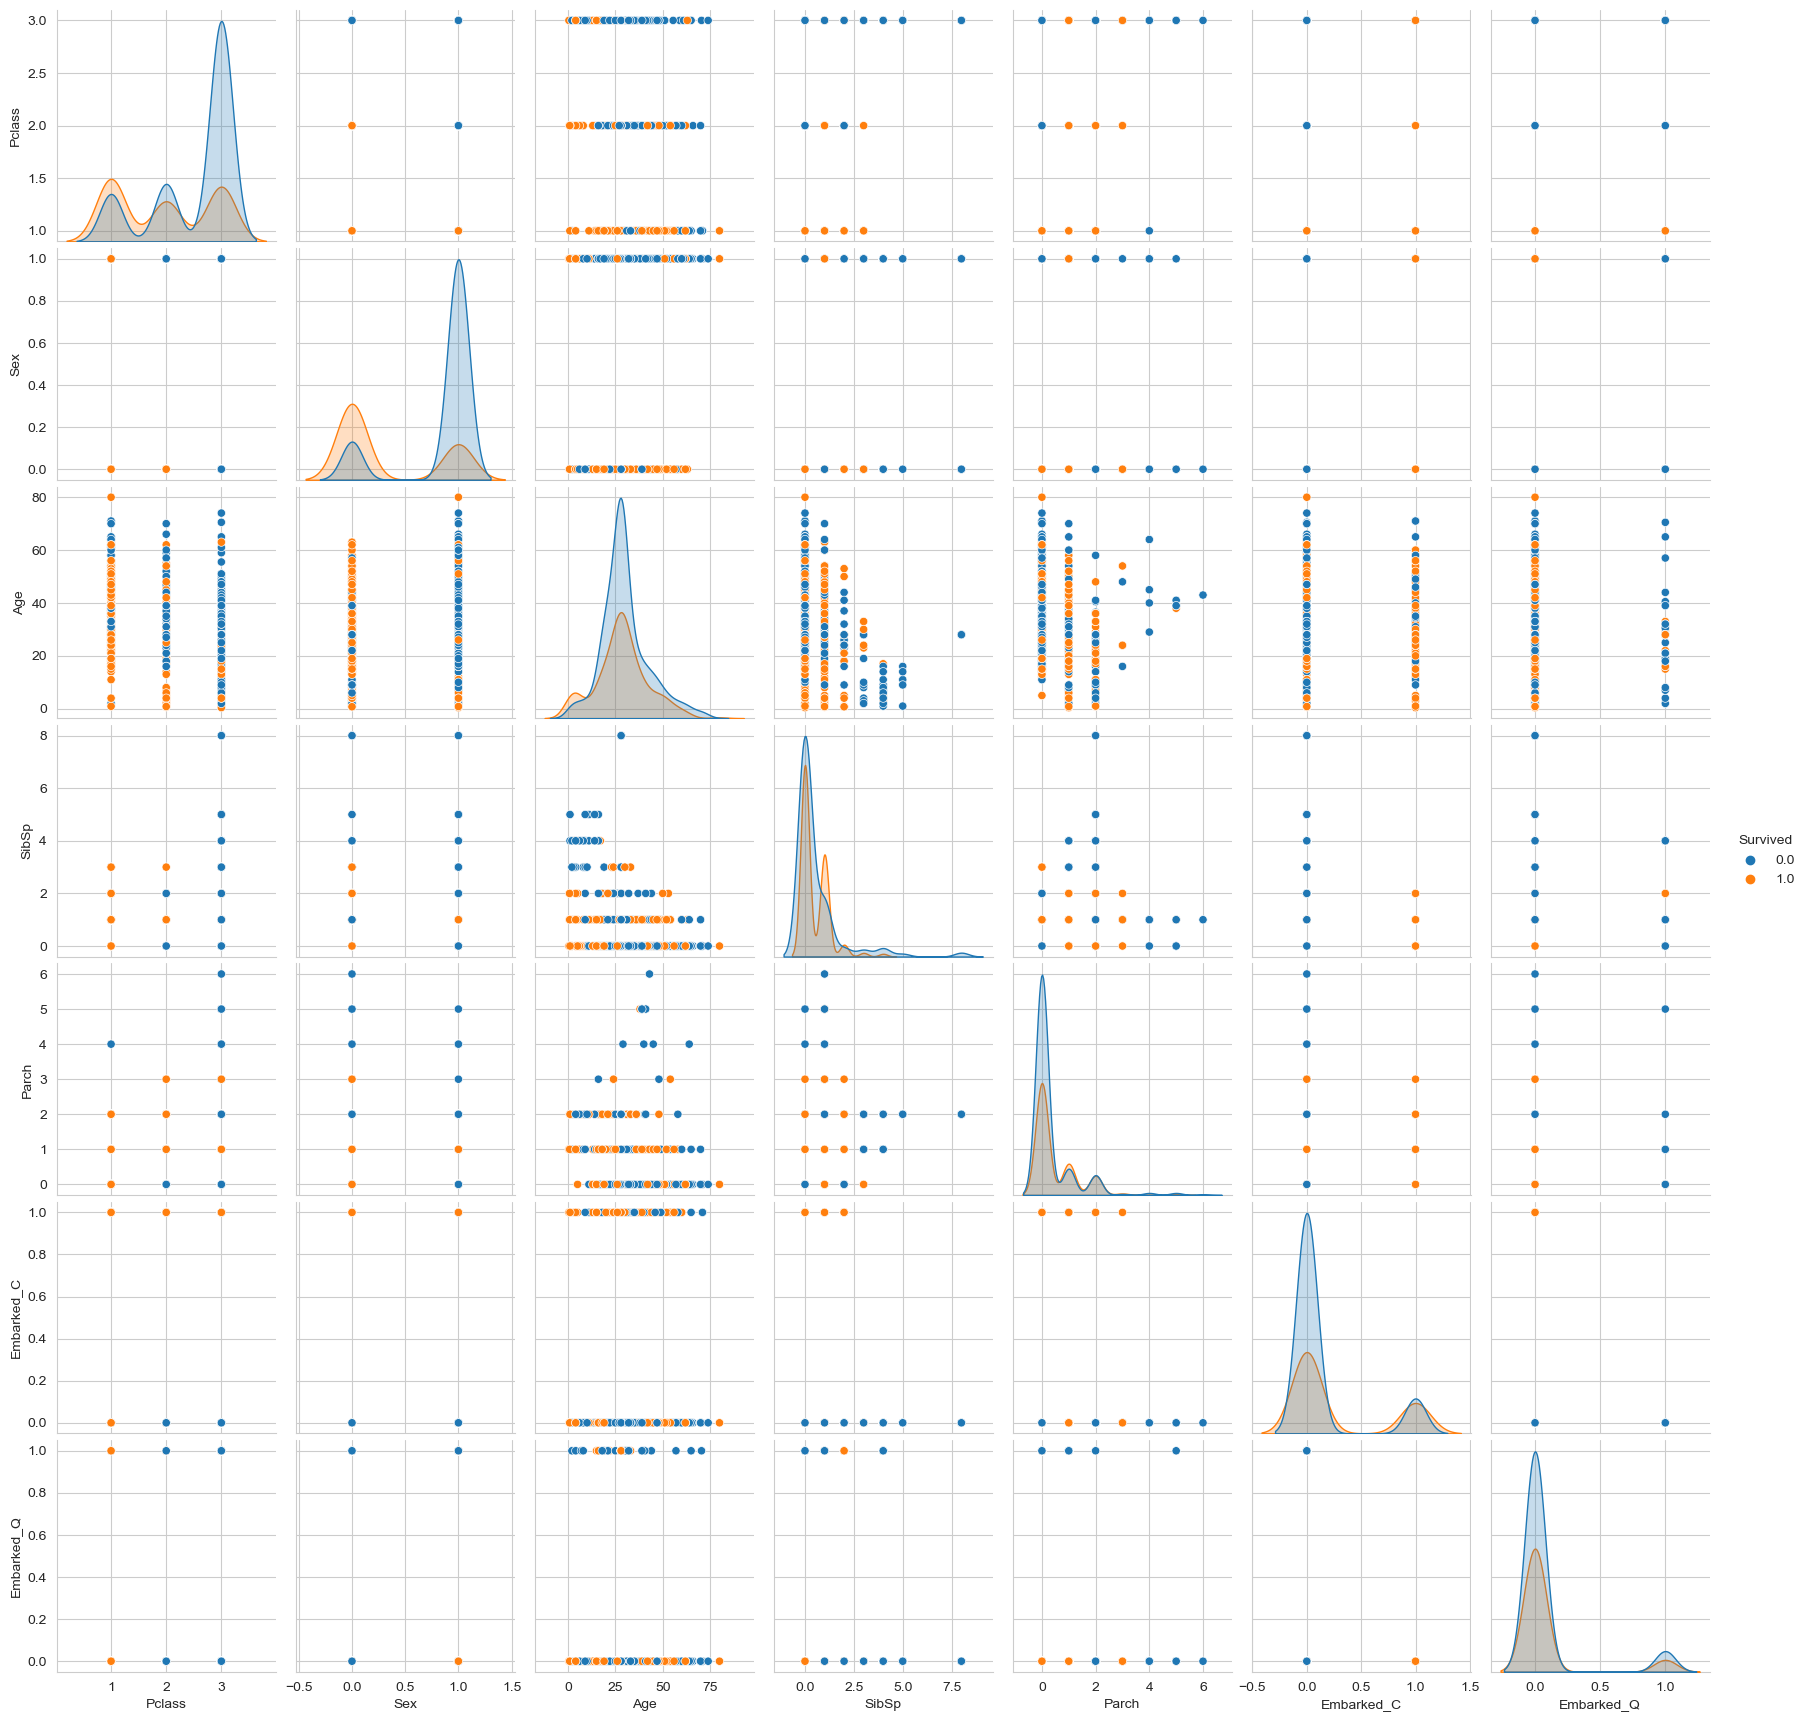

In [37]:
plt.figure(figsize = (14,5))
sns.set_style('whitegrid')
sns.pairplot(df_train2, x_vars=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q'], 
             y_vars=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q'], hue='Survived')

## Inference:

From the above pair plots we get the following observations:
- **Most of the people who have survived are 'Females'.**
- **Most of the people who have survived are from 'Pclass' 1.**
- **Most of the survived people have 'Parch'(# of parents / children aboard)  less than 2.**
- **Most of the survived people have 'SibSp'(# of siblings / spouses aboard the Titanic)  less than 3.**

In [38]:
df_train2['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [39]:
df_train2['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [40]:
((df_train2['Survived'] == 1) & (df_train2['Sex'] == 0)).sum()*100/342

68.12865497076024

In [41]:
((df_train2['Survived'] == 1) & (df_train2['Sex'] == 1)).sum()*100/342

31.871345029239766

### 68.13% of the survivors are females and 31.87% are males.

In [42]:
df_train2['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [43]:
((df_train2['Survived'] == 1) & (df_train2['Pclass'] == 1)).sum()*100/342

39.76608187134503

In [44]:
((df_train2['Survived'] == 1) & (df_train2['Pclass'] == 2)).sum()*100/342

25.43859649122807

In [45]:
((df_train2['Survived'] == 1) & (df_train2['Pclass'] == 3)).sum()*100/342

34.7953216374269

### 39.77% of the survivors are from Pclass 1, 25.44% from Pclass 2 and 34.80% are from Pclass3.

In [46]:
((df_train2['Survived'] == 1) & (df_train2['Parch'] < 2)).sum()*100/342

87.13450292397661

In [47]:
((df_train2['Survived'] == 1) & (df_train2['Parch'] >= 2)).sum()*100/342

12.865497076023392

### 87.13% of the survivors have 'Parch' less than 2 and 12.87% have 'Parch' greater than or equal to 2.

In [48]:
((df_train2['Survived'] == 1) & (df_train2['SibSp'] < 3)).sum()*100/342

97.953216374269

In [49]:
((df_train2['Survived'] == 1) & (df_train2['SibSp'] >= 3)).sum()*100/342

2.046783625730994

### 98.00% of the survivors have 'SibSp' less than 3 and 2% have 'SibSp' greater than or equal to 3.

## Seperating the dependent and independent variables and also removing the 'IsTrain' column added to label the train and test observations in 'df'.

In [50]:
x = df_train2.drop(columns=['Survived', 'IsTrain'])
y = df_train2[['Survived']]

In [51]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,0,0
1,1,0,38.0,1,0,1,0
2,3,0,26.0,0,0,0,0
3,1,0,35.0,1,0,0,0
4,3,1,35.0,0,0,0,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,0,0
887,1,0,19.0,0,0,0,0
888,3,0,28.0,1,2,0,0
889,1,1,26.0,0,0,1,0


In [52]:
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [53]:
test = df_test2.drop(columns=['Survived', 'IsTrain'])

In [54]:
test

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,3,1,34.5,0,0,0,1
1,3,0,47.0,1,0,0,0
2,2,1,62.0,0,0,0,1
3,3,1,27.0,0,0,0,0
4,3,0,22.0,1,1,0,0
...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,0,0
414,1,0,39.0,0,0,1,0
415,3,1,38.5,0,0,0,0
416,3,1,28.0,0,0,0,0


In [55]:
# Data is balanced because # class 0 < 2 * # class 1.
y.value_counts()

Survived
0.0         549
1.0         342
dtype: int64

In [56]:
# Splitting the train data into training and validation datasets.

from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1234)

In [58]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
170,1,1,61.0,0,0,0,0
488,3,1,30.0,0,0,0,0
42,3,1,28.0,0,0,1,0
410,3,1,28.0,0,0,0,0
147,3,0,9.0,2,2,0,0
...,...,...,...,...,...,...,...
204,3,1,18.0,0,0,0,0
53,2,0,29.0,1,0,0,0
294,3,1,24.0,0,0,0,0
723,2,1,50.0,0,0,0,0


In [59]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
523,1,0,44.0,0,1,1,0
778,3,1,28.0,0,0,0,1
760,3,1,28.0,0,0,0,0
496,1,0,54.0,1,0,1,0
583,1,1,36.0,0,0,1,0
...,...,...,...,...,...,...,...
484,1,1,25.0,1,0,1,0
96,1,1,71.0,0,0,1,0
706,2,0,45.0,0,0,0,0
218,1,0,32.0,0,0,1,0


In [60]:
y_train

,Survived
170,0.0
488,0.0
42,0.0
410,0.0
147,0.0
...,...
204,1.0
53,1.0
294,0.0
723,0.0


In [61]:
y_test

,Survived
523,1.0
778,0.0
760,0.0
496,1.0
583,0.0
...,...
484,1.0
96,0.0
706,1.0
218,1.0


## Hard-Margin SVM classifier:

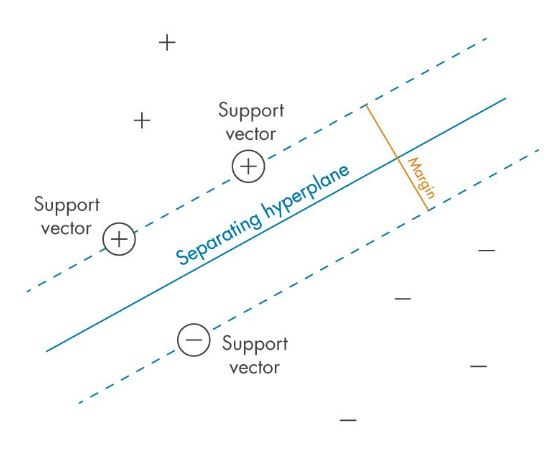

### Original problem:

$$\max_{w} \frac{2}{||w||^2}\\
\text{s.t. } (w^{T}x_{i} + b)y_{i} \geq 1 \text{, } \forall \text{ i from 1 to n}$$<br>

$x_i \text{: mx1 vector representing a datapoint in m-dimensional space} \\
y_i \text{: label for the i-th data point and } y_i \in \text{{-1, 1}} \\
w \text{: a mx1 vector that is normal to the classifier/hyperplane separating the two classes}\\
b \text{: bias term for the hyperplane}\\
\frac{2}{||w||} \text{is the width/distance b/w the two supporting hyperplanes}$

$\text{The quantity we are maximizing above is the} \frac{1}{2}width^{2} \text{ so we are essentially maximizing the
width b/w the two supporting hyperplanes.}$

$\text{The contraint in the above minimization problem ensures that all the data points are correctly classified by the classifier } w \text{ with enough margin} \\ 
\text{i.e. by a margin of atleast} \frac{1}{||w||} \text{w.r.t the classifier. In other words the positively labelled 
datapoints lie in the region } \\ (w^{T}x_{i} + b) \ge 1 \text{ and the negatively labelled datapoints lie in the region }
(w^{T}x_{i} + b) \le -1. $<br>

$ \textbf{The above problem maximization problem can be re-written as a minimization problem :}$

$$ \min_{w} \frac{1}{2}||w||^2\\
\text{s.t. } 1 - (w^{T}x_{i} + b)y_{i} \leq 0 \text{, } \forall \text{ i from 1 to n}$$


$\text{Now this is a constrained convex optimization problem because the objective function and all the constraints are convex functions.}$

$\text{Now we can combine both the objective function and the constraints into a single function known as the } 
\textbf{Lagrangian} \text{.}$<br><br>
$\textbf{The Primal problem in Hard-Margin SVM:}$

$$ \min_{w} \max_{\alpha \ge 0} (\frac{1}{2}||w||^2 + \sum \limits _{i=1} ^{n} \alpha_i (1 - (w^{T}x_{i} + b)y_{i})) $$
$ \alpha \text{ is a nx1 vector containing } \alpha_i \text{ values for each } x_i$

$\textbf{The Dual of this Primal problem then can be written as max min problem because we have a convex optimization problem.} $

$$ \max_{\alpha \ge 0} \min_{w} (\frac{1}{2}||w||^2 + \sum \limits _{i=1} ^{n} \alpha_i (1 - (w^{T}x_{i} + b)y_{i})) $$

$ \text{For this constrained convex optimization problem we get these } \textbf{Karush-Kuhn-Tucker(KKT)} \text{ conditions:}\\
\nabla \frac{1}{2}||w||^2 + \sum \limits _{i=1} ^{n} \alpha_i  \nabla (1 - (w^{T}x_{i} + b)y_{i}) = 0 \textbf{ # Stationary point condition.}\\
(1 - (w^{T}x_{i} + b)y_{i}) \le 0 \textbf{ # Primal feasibility condition.} \\
\alpha_i (1 - (w^{T}x_{i} + b)y_{i}) = 0 \textbf{ # Complementary slackness condition.} \\
\alpha_i \ge 0 \textbf{ # Dual feasibility condition.}$<br>

$\textbf{From the stationary point condition we get:} \\
w = \sum \limits _{i=1} ^{n} \alpha_i y_i x_i \\
\text{s.t.}
\sum \limits _{i=1} ^{n} \alpha_i y_i = 0 $

$ \text{Now we back substitute the value of } w \text{ and the constraint we got from the stationary point condition for Hard-Margin SVM into the dual} \\ \text{function and we get:}$ <br>
$$ \max_{\alpha \ge 0} \sum \limits _{i=1} ^{n} \alpha_i - \frac{1}{2} \sum \limits _{i=1} ^{n} \sum \limits _{j=1} ^{n} 
\alpha_i \alpha_j y_i y_j (x_i \cdot x_j) $$

$\text{The above problem can be solved using the} \textbf{ SMO(Sequential Minimal Optimization) algorithm} \text{ in order 
to find the }\\ \alpha \text{ which maximizes the above objective function.}$

$ \text{From the } \textbf{Complementary slackness condition: } \alpha_i (1 - (w^{T}x_{i} + b)y_{i}) = 0 \text{, we can see that for }\alpha_i \ne 0 \text{, } x_i  \text{ are the data points which} \\ \text{lie on } (w^{T}x_{i} + b)y_{i} = 1 \text{ i.e. on the supporting hyperplanes and such data points are called } \textbf{Support Vectors} \text{ because they are the ones which} \\ \text{contribute for } w \text{. And for } \alpha_i = 0 \text{ are the data points which do not contribute for } w \text{ but are the data points that have been classified correctly} \\ \text{by the classifier } w \text{ with sufficient margin.}  $

## Soft-Margin SVM classifier:

$ \text{The Hard-Margin SVM classifier cannot capture the true structure of the data when the data has outliers even if we use
kernels. That} \\ \text{is where the Soft-Margin SVM classifier comes in to handle this. The way Soft-Margin SVM classifier handle the outliers in the data is} \\ \text{by allowing the classifier to misclassify some of the data points which would 
most likely be the outliers.}$

$ \text{Also Hard-Margin SVM classifier cannot always find a hyperplane which correctly classifes all the 
data points with sufficient} \\ \text{margin. So we add a term } \epsilon_i \ge 0 \text{ to } (w^{T}x_{i} + b)y_{i} \text{ 
that would satisfy the constraint: } (w^{T}x_{i} + b)y_{i} + \epsilon_i \geq 1 \text{, } \forall \text{ i from 1 to n.}$

$\text{As a result all outliers would also be correctly classified by choosing an appropriate } \epsilon_i \text{ and this 
would mean the solution to the constrained} \\
\text{minimization problem in the Hard-Margin SVM classifier stated before would be } w=0.$

$\text{So this means we don't learn any classifier at all to classifiy the future test data points.} $

$\text{To prevent the outliers from being correctly classified by arbitrarily choosing a } \epsilon_i \text{we add a cost 
term or a regularization term: }$

$$C\sum \limits _{i=1} ^{n} \epsilon_i$$

$ \text{where } C \gt 0 \text{ to the objective function of the minimization problem in the Hard-Margin SVM classifier case so that the SVM algorithm focus} \\ \text{ on finding a classifier that captures the true structure of the data and which also classifies most of the  datapoints with sufficient margin. }$

$\textbf{Soft-Margin classifier formulation:}$
$$ \min_{w} \frac{1}{2}||w||^2 + C\sum \limits _{i=1} ^{n} \epsilon_i \\
\text{s.t. } 1 - (w^{T}x_{i} + b)y_{i} - \epsilon_i \leq 0 \text{, } \forall \text{ i from 1 to n}$$
$$ \epsilon_i \ge 0$$

$\textbf{The Primal problem in Soft-Margin SVM:}$

$$ \displaystyle \large \min_ {w, \epsilon \ge 0} \hspace{1em} \max_{\alpha \ge 0, \beta \ge 0} (\frac{1}{2}||w||^2 + C\sum \limits _{i=1} ^{n} \epsilon_i + \sum \limits _{i=1} ^{n} \alpha_i (1 - (w^{T}x_{i} + b)y_{i} - \epsilon_i) + \sum \limits _{i=1} ^{n} \beta_i (-\epsilon_i)) $$

$ C \gt 0$

$\epsilon \text{, } \alpha \text{, and } \beta  \text{ are nx1 vectors containing } \epsilon_i \text{, } \alpha_i \text{ and } 
\beta_i \text{ values respectively for each } x_i$

$\textbf{Dual problem in Soft-Margin SVM:}$

$$ \displaystyle \large \max_{\alpha \ge 0, \beta \ge 0} \hspace{1em} \min_{w, \epsilon \ge 0} (\frac{1}{2}||w||^2 + C\sum \limits _{i=1} ^{n} \epsilon_i + \sum \limits _{i=1} ^{n} \alpha_i (1 - (w^{T}x_{i} + b)y_{i} - \epsilon_i) + \sum \limits _{i=1} ^{n} \beta_i (-\epsilon_i)) $$
$ C \gt 0 $

$\epsilon \text{, } \alpha \text{, and } \beta  \text{ are nx1 vectors containing } \epsilon_i \text{, } \alpha_i \text{ and } 
\beta_i \text{ values respectively for each } x_i$

$ \text{For this constrained convex optimization problem we get these } \textbf{Karush-Kuhn-Tucker(KKT)} \text{ conditions:}\\
\nabla \frac{1}{2}||w||^2 + C\sum \limits _{i=1} ^{n} \nabla \epsilon_i + \sum \limits _{i=1} ^{n} \alpha_i  \nabla (1 - (w^{T}x_{i} + b)y_{i} - \epsilon_i) + \sum \limits _{i=1} ^{n} \beta_i \nabla (-\epsilon_i) = 0 \textbf{ # Stationary point condition.}\\
(1 - (w^{T}x_{i} + b)y_{i} - \epsilon_i) \le 0 \textbf{ # Primal feasibility condition.} \\
\epsilon_i \ge 0 \textbf{ # Primal feasibility condition.} \\
\alpha_i (1 - (w^{T}x_{i} + b)y_{i} - \epsilon_i) = 0 \textbf{ # Complementary slackness condition.} \\
\beta_i(-\epsilon_i) = 0 \textbf{ # Complementary slackness condition.} \\
\alpha_i \ge 0 \textbf{ # Dual feasibility condition.} \\
\beta_i \ge 0 \textbf{ # Dual feasibility condition.}$<br>

$\textbf{From the stationary point condition we get:} \\
w = \sum \limits _{i=1} ^{n} \alpha_i y_i x_i \\
\text{s.t.}
\sum \limits _{i=1} ^{n} \alpha_i y_i = 0 \text{ and } \alpha_i + \beta_i = C \text{, } \forall \text{ i from 1 to n} $

$ \text{Now we back substitute the value of } w \text{ and the constraint we got from the stationary point condition for Soft-Margin SVM} \\ \text{into the dual function and we get:}$ <br>
$$ \displaystyle \large \max_{0 \le \alpha \le C} \sum \limits _{i=1} ^{n} \alpha_i - \frac{1}{2} \sum \limits _{i=1} ^{n} \sum \limits _{j=1} ^{n}
\alpha_i \alpha_j y_i y_j (x_i \cdot x_j) $$

$\text{The above problem can be solved using the} \textbf{ SMO(Sequential Minimal Optimization) algorithm} \text{ in order 
to find the }\\ \alpha \text{ which maximizes the above objective function.}$

$ \text{From the } \textbf{Complementary slackness conditions: } \alpha_i (1 - (w^{T}x_{i} + b)y_{i} - \epsilon_i) = 0 \text{, } \beta_i(-\epsilon_i) = 0 \text{ and from the primal and dual contraints we} \\ \text{can see that for } \alpha_i \in (0,C) \text{, } x_i  \text{ are the data points which } \text{lie on } (w^{T}x_{i} + b)y_{i} = 1 \text{ i.e. on the supporting hyperplanes and such data points are} \\ \text{called } \textbf{Support Vectors} \text{ because they are the ones which contribute for } w \text{. For } \alpha_i = C \text{, } x_i \text{ are the data points which lie in the region: } \\ (w^{T}x_{i} + b)y_{i} \le 1  \text{ and they are also known as } \textbf{Support Vectors} \text{ because they too contribute for } w \text{ . And for } \alpha_i = 0 \text{ are the data points} \\ \text{which do not contribute for } w \text{ but are the data points that have been classified correctly by the classifier } w \text{ with sufficient margin.} $

$ \textbf{Some of the popular kernels used in SVM are:}$


$\textbf{Linear Kernel: } (x_i \cdot x_j + c) \text{ where c } \in \mathbb{R} \\
\textbf{Polynomial Kernel: } (a (x_i \cdot x_j) + c)^d \text{ where a, c } \in \mathbb{R} \text{ and d is psoitive integer.} \\
\textbf{Sigmoid Kernel: } \tanh(a (x_i \cdot x_j) + c)  \text{ where a, c } \in \mathbb{R} \\
\textbf{Radial Basis Function Kernel: } exp (-\gamma ||x_i - x_j||^{2}) \text{ where } \gamma \in \mathbb{R}$

$\text{In the SVM formulation we saw above in both }\textbf{Hard-Margin} \text{ and } \textbf{Soft-Margin} \text{ case the} \textbf{ Linear Kernel} \text{ was being used. But
sometimes} \\ \text{a linear boundary/classifer may not exist, that is when we resort to other kernels in order to get a non-linear decision boundary.}
$

## Building the SVM based model:

In [62]:
from sklearn.svm import SVC

In [63]:
svc_model_linear = SVC(kernel='linear')
svc_model_linear.fit(x_train, y_train.iloc[:, 0])
y_pred_train_linear = svc_model_linear.predict(x_train)
y_pred_test_linear = svc_model_linear.predict(x_test)

In [64]:
# Here we get the w vector which is normal to the classifier we have in the SVM formulation.
svc_model_linear.coef_

array([[-1.11011318e-03, -2.00019947e+00, -5.96294954e-05,
        -1.24579195e-03, -2.36240770e-04,  9.41369355e-04,
         7.76636375e-04]])

In [65]:
pd.DataFrame({'Feature Name': x_train.columns, 'Weight': svc_model_linear.coef_[0]})

,Feature Name,Weight
0,Pclass,-0.001110
1,Sex,-2.000199
2,Age,-0.000060
3,SibSp,-0.001246
4,Parch,-0.000236
5,Embarked_C,0.000941
6,Embarked_Q,0.000777


In [66]:
# Here we get the the bias term b that we have in the SVM formulation.
svc_model_linear.coef0

0.0

In [67]:
# Here we get the alpha_i values for all x_i that we have in the SVM formulation.
svc_model_linear.dual_coef_

array([[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -6.39581306e-01, -1.00000000e+00, -1.00000000e+0

In [68]:
svc_model_poly = SVC(kernel='poly')
svc_model_poly.fit(x_train, y_train.iloc[:, 0])
y_pred_train_poly = svc_model_poly.predict(x_train)
y_pred_test_poly = svc_model_poly.predict(x_test)

In [69]:
svc_model_sigmoid = SVC(kernel='sigmoid')
svc_model_sigmoid.fit(x_train, y_train.iloc[:, 0])
y_pred_train_sigmoid = svc_model_sigmoid.predict(x_train)
y_pred_test_sigmoid = svc_model_sigmoid.predict(x_test)

In [70]:
svc_model_rbf = SVC(kernel='rbf')
svc_model_rbf.fit(x_train, y_train.iloc[:, 0])
y_pred_train_rbf = svc_model_rbf.predict(x_train)
y_pred_test_rbf = svc_model_rbf.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [72]:
print("Train accuracy - linear kernel:", accuracy_score(y_train, y_pred_train_linear))
print("*"*15)
print("Test accuracy - linear kernel:", accuracy_score(y_test, y_pred_test_linear))
print("*"*15)

print("Train accuracy - polynomial kernel:", accuracy_score(y_train, y_pred_train_poly))
print("*"*15)
print("Test accuracy - polynomial kernel:", accuracy_score(y_test, y_pred_test_poly))
print("*"*15)

print("Train accuracy - sigmoid kernel:", accuracy_score(y_train, y_pred_train_sigmoid))
print("*"*15)
print("Test accuracy - sigmoid kernel:", accuracy_score(y_test, y_pred_test_sigmoid))
print("*"*15)

print("Train accuracy - rbf kernel:", accuracy_score(y_train, y_pred_train_rbf))
print("*"*15)
print("Test accuracy - rbf kernel:", accuracy_score(y_test, y_pred_test_rbf))
print("*"*15)

Train accuracy - linear kernel: 0.7829341317365269
***************
Test accuracy - linear kernel: 0.7982062780269058
***************
Train accuracy - polynomial kernel: 0.6452095808383234
***************
Test accuracy - polynomial kernel: 0.6098654708520179
***************
Train accuracy - sigmoid kernel: 0.531437125748503
***************
Test accuracy - sigmoid kernel: 0.547085201793722
***************
Train accuracy - rbf kernel: 0.6541916167664671
***************
Test accuracy - rbf kernel: 0.5964125560538116
***************


In [73]:
# https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format

def draw_confusion_matrix(y_true, y_pred, c_matrix_for):
    labels = ['Not Survived', 'Survived']
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='.3g', xticklabels=labels, 
            yticklabels=labels, cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {c_matrix_for}')
    plt.show()

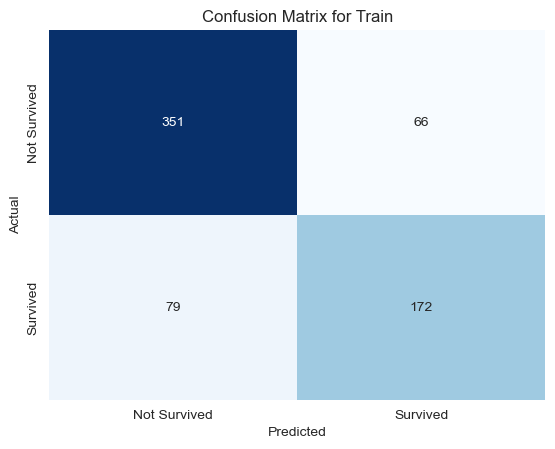

In [74]:
draw_confusion_matrix(y_train, y_pred_train_linear, c_matrix_for='Train')

In [75]:
print("Train Accuracy - linear kernel:")
print(classification_report(y_train, y_pred_train_linear))
print("Test Accuracy - linear kernel:")
print(classification_report(y_test, y_pred_test_linear))

Train Accuracy - linear kernel:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       417
         1.0       0.72      0.69      0.70       251

    accuracy                           0.78       668
   macro avg       0.77      0.76      0.77       668
weighted avg       0.78      0.78      0.78       668

Test Accuracy - linear kernel:
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       132
         1.0       0.80      0.67      0.73        91

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.80      0.79       223



In [76]:
# Performing Cross Validation on the train and validation set:

from sklearn.model_selection import cross_val_score

In [77]:
train_accuracy = cross_val_score(svc_model_linear, x_train, y_train.iloc[:, 0], cv=10)
test_accuracy = cross_val_score(svc_model_linear, x_test, y_test.iloc[:, 0], cv=10)

In [78]:
print("Train accuracy:", train_accuracy)
print("Train mean accuracy :", train_accuracy.mean())
print("Train max accuracy :", train_accuracy.max())

Train accuracy: [0.8358209  0.7761194  0.73134328 0.76119403 0.80597015 0.73134328
 0.7761194  0.79104478 0.78787879 0.83333333]
Train mean accuracy : 0.7830167345092718
Train max accuracy : 0.835820895522388


In [79]:
print("Test accuracy:", test_accuracy)
print("Test mean accuracy :", test_accuracy.mean())
print("Test max accuracy :", test_accuracy.max())

Test accuracy: [0.69565217 0.82608696 0.91304348 0.81818182 0.86363636 0.77272727
 0.81818182 0.72727273 0.81818182 0.72727273]
Test mean accuracy : 0.7980237154150198
Test max accuracy : 0.9130434782608695


## Using GridSearchCV to find the best SVM parameters:

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf']}

# 'refit' keyword argument indicates that after the best parameters have been found do we need to again train the model using
# those best parameters.
# 'verbose' keyword argument indicates the granularity of the log messages.
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [82]:
grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.634 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.627 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.774 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.776 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.799 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.776 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.784 total time=   0.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [83]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [84]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [85]:
grid.best_score_

0.8204017506452699

In [86]:
best_svc_model = grid.best_estimator_

In [87]:
best_svc_model.fit(x_train, y_train.values.ravel())

SVC(C=1000, gamma=0.001)

In [88]:
y_pred_train_best = best_svc_model.predict(x_train)
y_pred_test_best = best_svc_model.predict(x_test)

In [89]:
print("Train Accuracy - rbf kernel:")
print(classification_report(y_train, y_pred_train_best))
print("Test Accuracy - rbf kernel:")
print(classification_report(y_test, y_pred_test_best))

Train Accuracy - rbf kernel:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       417
         1.0       0.79      0.74      0.76       251

    accuracy                           0.83       668
   macro avg       0.82      0.81      0.81       668
weighted avg       0.83      0.83      0.83       668

Test Accuracy - rbf kernel:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       132
         1.0       0.82      0.71      0.76        91

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



## Building a Logistic Regression based model:

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lor_model = LogisticRegression()

In [92]:
lor_model.fit(x_train, y_train.values.ravel())

LogisticRegression()

In [93]:
y_predict_train_lor = lor_model.predict(x_train)
y_predict_test_lor = lor_model.predict(x_test)

In [94]:
print("Train Accuracy - Logistic Regression model:")
print(classification_report(y_train, y_predict_train_lor))
print("Test Accuracy - Logistic Regression model:")
print(classification_report(y_test, y_predict_test_lor))

Train Accuracy - Logistic Regression model:
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       417
         1.0       0.73      0.71      0.72       251

    accuracy                           0.79       668
   macro avg       0.78      0.78      0.78       668
weighted avg       0.79      0.79      0.79       668

Test Accuracy - Logistic Regression model:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       132
         1.0       0.80      0.73      0.76        91

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



## Building a Decision Tree Classifier based model:

In [95]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [96]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=4)

In [97]:
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [98]:
y_pred_train_dt_classifier = decision_tree_classifier.predict(x_train)
y_pred_test_dt_classifier = decision_tree_classifier.predict(x_test)

In [99]:
print("Train Accuracy - Decison Classifer model:")
print(classification_report(y_train, y_pred_train_dt_classifier))
print("Test Accuracy - Decison Classifer model:")
print(classification_report(y_test, y_pred_test_dt_classifier))

Train Accuracy - Decison Classifer model:
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       417
         1.0       0.81      0.74      0.77       251

    accuracy                           0.84       668
   macro avg       0.83      0.82      0.82       668
weighted avg       0.83      0.84      0.83       668

Test Accuracy - Decison Classifer model:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       132
         1.0       0.86      0.68      0.76        91

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



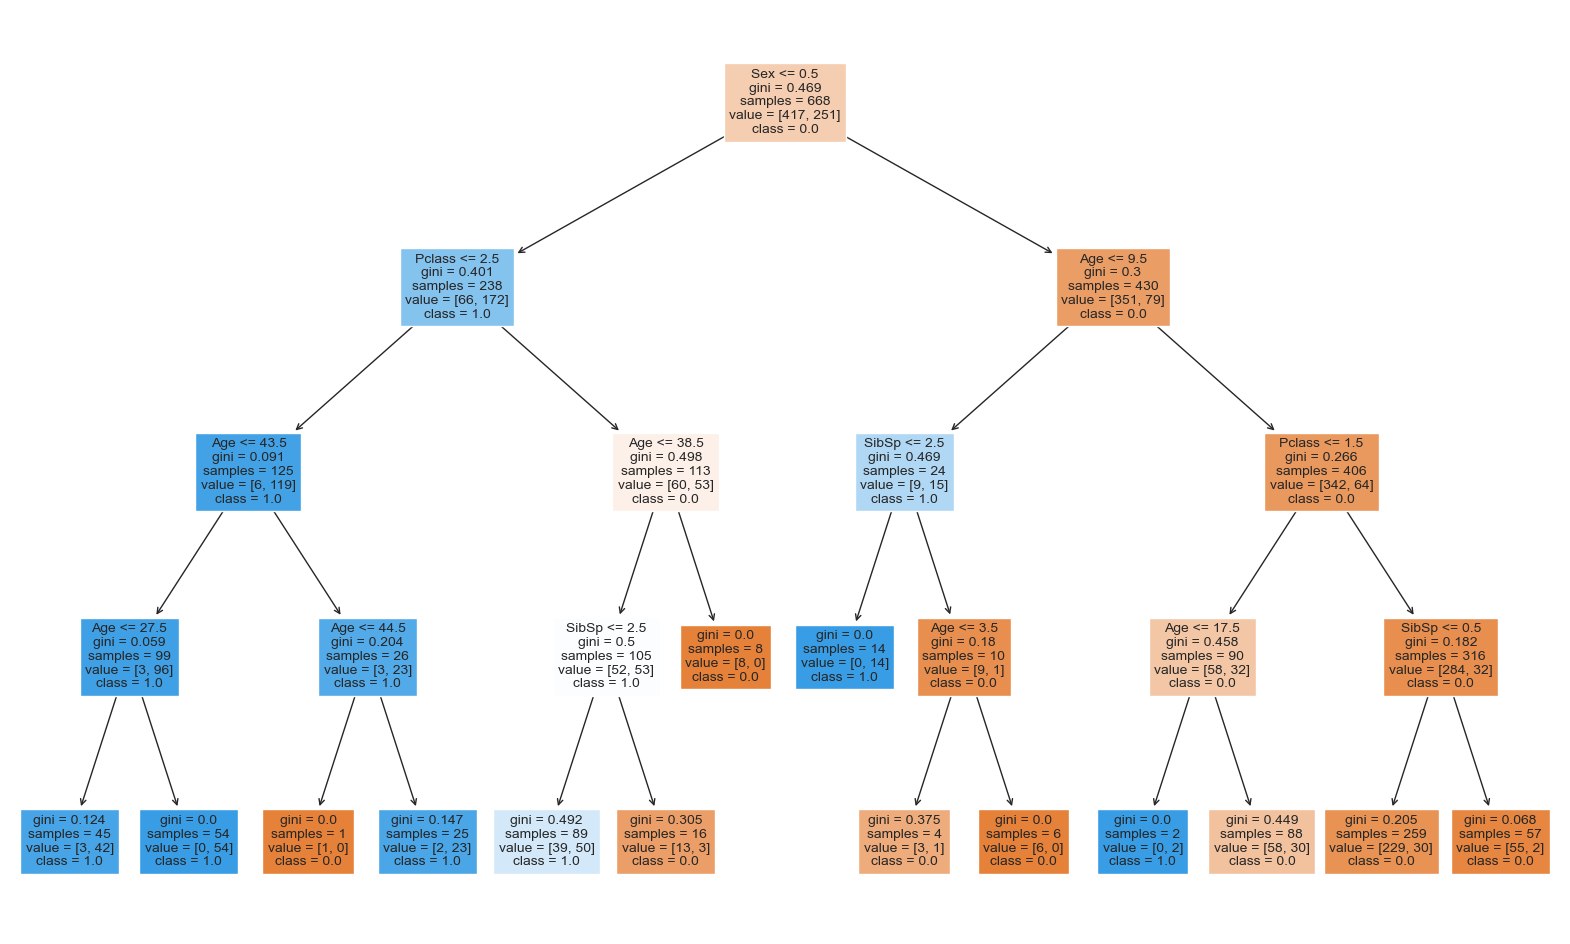

In [100]:
# Plotting the Decision Tree Classifier:

plt.figure(figsize=(20,12))
plot_tree(decision_tree_classifier, filled=True, feature_names=x_train.columns.tolist(), 
          class_names=np.unique(y_train).astype('U'), fontsize=10)
plt.show()

## Using Voting technique to combine multiple models:

**Voting** is an ensemble method in which multiple diverse base learners are used to make predictions. Voting can be used for both classification and regression type of problems.

The idea behind Voting comes from the **'Wisdom of the Crowd'** concept. Voting uses multiple base learners that are diverse which 
means their accuracies vary and they perform well on different subsets of the dataset; combining these learners helps us reduce 
the overfitting and high bias problems and provides a model that capture a broader range of patterns and produces robust 
predictions. 

When Voting is used for classification there are two ways to combine the outputs of the multiple base learners:
- To use the class label that has been predicted as output by most of the base learners as the final prediction of voting. 
    This approach is known as **Hard Voting**.
    
    
- To assign weights to each base learner on the basis of their individual performance and make the base learner generate
    probabilities for the test data point belonging to different classes. And then we can compute that class label for which 
    the sum of weighted probabilities is maximum as the final prediction of voting. This approach is known as **Soft Voting**.
    
When Voting is used for regression, again there are two ways to combine the outputs of the multiple base learners:
- Since in regression each base learner generates a continuous numeric values, the output from each models can be combined
    by finding the average or median of it and then outputting that as the final prediction. This is the **Hard Voting** way
    of producing regression outputs.
    
    
- The **Soft Voting** way of producing regression outputs is to take the weighted average of the outputs of each base learner
    and then output that as the final prediction. The weights of each base learner is calculated based on the performance of 
    individual base learner on the training dataset.
    

In [101]:
from sklearn.ensemble import VotingClassifier

In [102]:
# Creating a list of tuples where each tuple is an ordered pair containing the classifier_name and the classifier.

estimators = [('SVM_Linear', svc_model_linear),('LogisticRegression', lor_model),('DecisionTree', decision_tree_classifier)]

## Using a Hard Voting classifier:

In [103]:
hard_voting_classifier = VotingClassifier(estimators = estimators, voting='hard')

In [104]:
hard_voting_classifier.fit(x_train, y_train.values.ravel())

VotingClassifier(estimators=[('SVM_Linear', SVC(kernel='linear')),
                             ('LogisticRegression', LogisticRegression()),
                             ('DecisionTree',
                              DecisionTreeClassifier(max_depth=4))])

In [105]:
y_pred_train_hard_voting = hard_voting_classifier.predict(x_train)
y_pred_test_hard_voting = hard_voting_classifier.predict(x_test)

In [106]:
print("Train Accuracy - Hard Voting:")
print(classification_report(y_train, y_pred_train_hard_voting))
print("Test Accuracy - Hard Voting:")
print(classification_report(y_test, y_pred_test_hard_voting))

Train Accuracy - Hard Voting:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       417
         1.0       0.78      0.69      0.73       251

    accuracy                           0.81       668
   macro avg       0.80      0.78      0.79       668
weighted avg       0.81      0.81      0.81       668

Test Accuracy - Hard Voting:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       132
         1.0       0.85      0.69      0.76        91

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



## Using a Soft Voting classifier:

In [107]:
soft_voting_classifier = VotingClassifier(estimators = estimators, voting='soft')

In [108]:
y_pred_train_soft_voting = hard_voting_classifier.predict(x_train)
y_pred_test_soft_voting = hard_voting_classifier.predict(x_test)

In [109]:
print("Train Accuracy - Soft Voting:")
print(classification_report(y_train, y_pred_train_soft_voting))
print("Test Accuracy - Soft Voting:")
print(classification_report(y_test, y_pred_test_soft_voting))

Train Accuracy - Soft Voting:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       417
         1.0       0.78      0.69      0.73       251

    accuracy                           0.81       668
   macro avg       0.80      0.78      0.79       668
weighted avg       0.81      0.81      0.81       668

Test Accuracy - Soft Voting:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       132
         1.0       0.85      0.69      0.76        91

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



## Conclusion:

In the **SVM based classifier** out of the 4 kernels: **linear**, **polynomial**, **sigmoid** and **rbf**, the **linear** kernel gives the best accuracy when no hyperparameter tuning has been done for the models using any of these kernels.

- Train accuracy - linear kernel: **78.29%**
- Test accuracy - linear kernel: **79.82%**

- Train accuracy - polynomial kernel: **64.52%**
- Test accuracy - polynomial kernel: **61.00%**

- Train accuracy - sigmoid kernel: **53.14%**
- Test accuracy - sigmoid kernel: **54.71%**

- Train accuracy - rbf kernel: **65.42%**
- Test accuracy - rbf kernel: **59.64%**

From the Linear Kernel it has been found that: **Sex**, **Pclass** and **SibSp** are the most important feature variables in 
deciding whether a person has survived or not.

After doing hyperparameter tuning for the **rbf** kernel using **GridSearchCV** we get:

- **C**(regularization parameter) = 1000, **gamma** = 0.001
- Train accuracy - **rbf kernel**: **83%**
- Test accuracy - **rbf kernel**: **82%**

- Train macro-averaged f1-score: **81%**
- Test macro-averaged f1-score: **81%**

**For the Logistic Regression based classifier:**
- Train accuracy: **79%**
- Test accuracy: **82%**

- Train macro-averaged f1-score: **78%**
- Test macro-averaged f1-score: **81%**

**For the Decision Tree based classifier:**

With Pre-Pruning where **max_depth** = **4**:
- Train accuracy: **84%**
- Test accuracy: **83%**

- Train macro-averaged f1-score: **82%**
- Test macro-averaged f1-score: **81%**


**For the Hard-Voting based classifier:**
- Train accuracy: **81%**
- Test accuracy: **83%**

- Train macro-averaged f1-score: **79%**
- Test macro-averaged f1-score: **81%**

**For the Soft-Voting based classifier:**
- Train accuracy: **81%**
- Test accuracy: **83%**

- Train macro-averaged f1-score: **79%**
- Test macro-averaged f1-score: **81%**

From the above analysis we can see that the best results are obtained using the: **Decision Tree based classifier** and 
**SVM based classifier with rbf kernel**.

And **Logistic Regression** and **Voting based classifiers** also do well for this **'Titanic'** dataset classification problem.

And finally for this dataset either of the individual models like **Decision Tree based classifier** or **SVM based classifier with rbf kernel** or **Logistic Regression** is sufficient because these models have very good accuracy and they also do not suffer from any overfitting or high bias problems so using **Voting based classifiers** for this dataset will increase the model's complexity and training time.